In [4]:
import numpy as np
import matplotlib.pyplot as plt
import matfile 
%matplotlib notebook
%matplotlib notebook
import seawater.eos80 as sw
import seawater.constants as swcons
import xarray as xr
import scipy.signal as sig


In [6]:
fname = '201909b/20190930A1.nc'

<IPython.core.display.Javascript object>


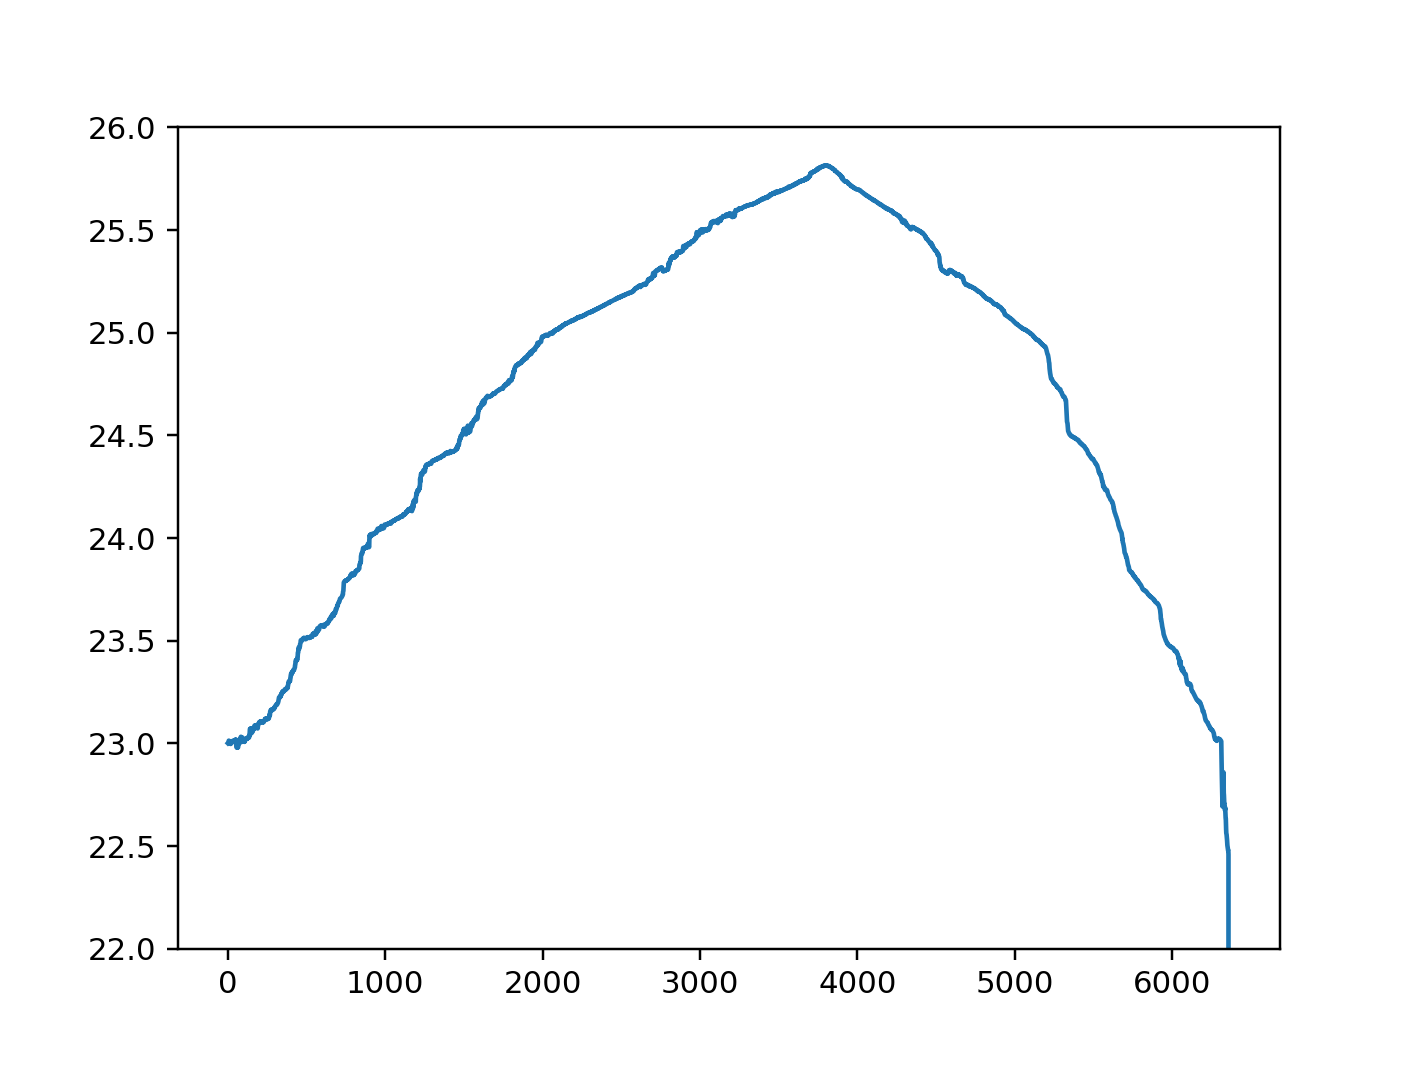

In [7]:
with xr.open_dataset(fname) as ctd:
    fig, ax = plt.subplots()
    ax.plot(ctd.pden-1000)
    ax.set_ylim(22, 26)

<xarray.Dataset>
Dimensions:    (scan: 6369)
Coordinates:
  * scan       (scan) int64 459 460 461 462 463 464 ... 6823 6824 6825 6826 6827
Data variables:
    temp       (scan) float64 ...
    cond0      (scan) float64 ...
    pres       (scan) float64 ...
    sal        (scan) float64 ...
    Flu        (scan) float64 ...
    O2sat      (scan) float64 ...
    time       datetime64[ns] ...
    direction  (scan) float64 ...
    cond       (scan) float64 ...
    pden       (scan) float64 ...
Attributes:
    lat:      48.720083333333335
    lon:      -123.23991666666667
    id:       A1
    alongx:   29.162916291629166
    acrossx:  0.937092420308541


<IPython.core.display.Javascript object>


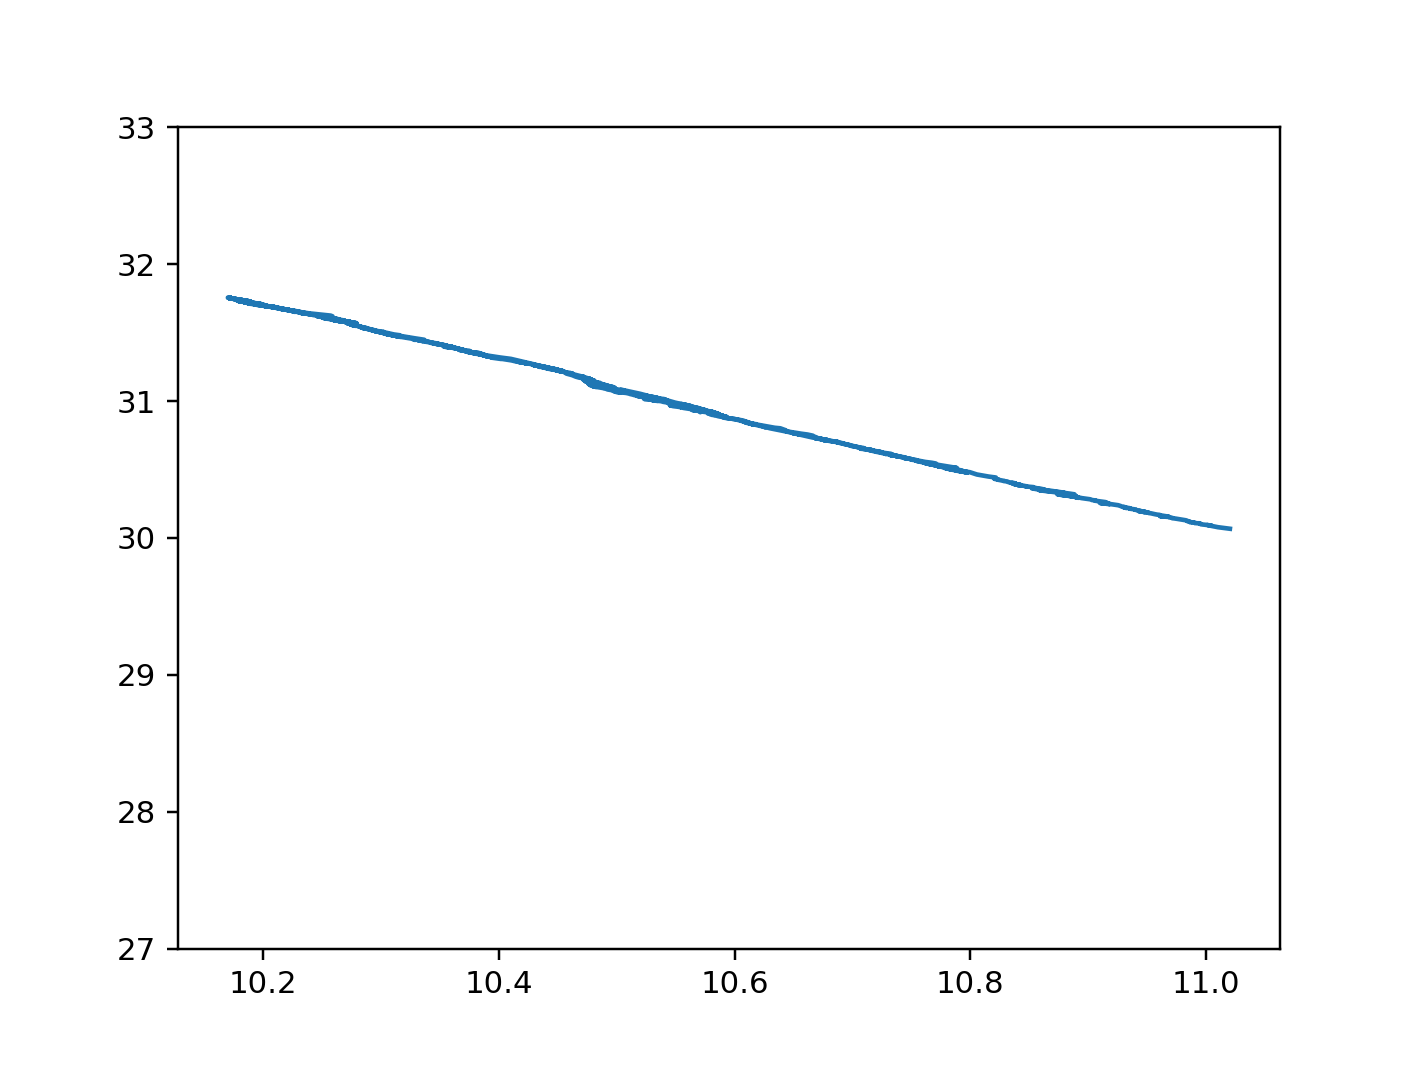

In [8]:
with xr.open_dataset(fname) as ctd:
    print(ctd)
    fig, ax = plt.subplots()
    ctd = ctd.isel(scan=slice(540, len(ctd.scan)-100))
    ax.plot(ctd.temp, ctd.sal)
    ax.set_ylim([27, 33])

<IPython.core.display.Javascript object>


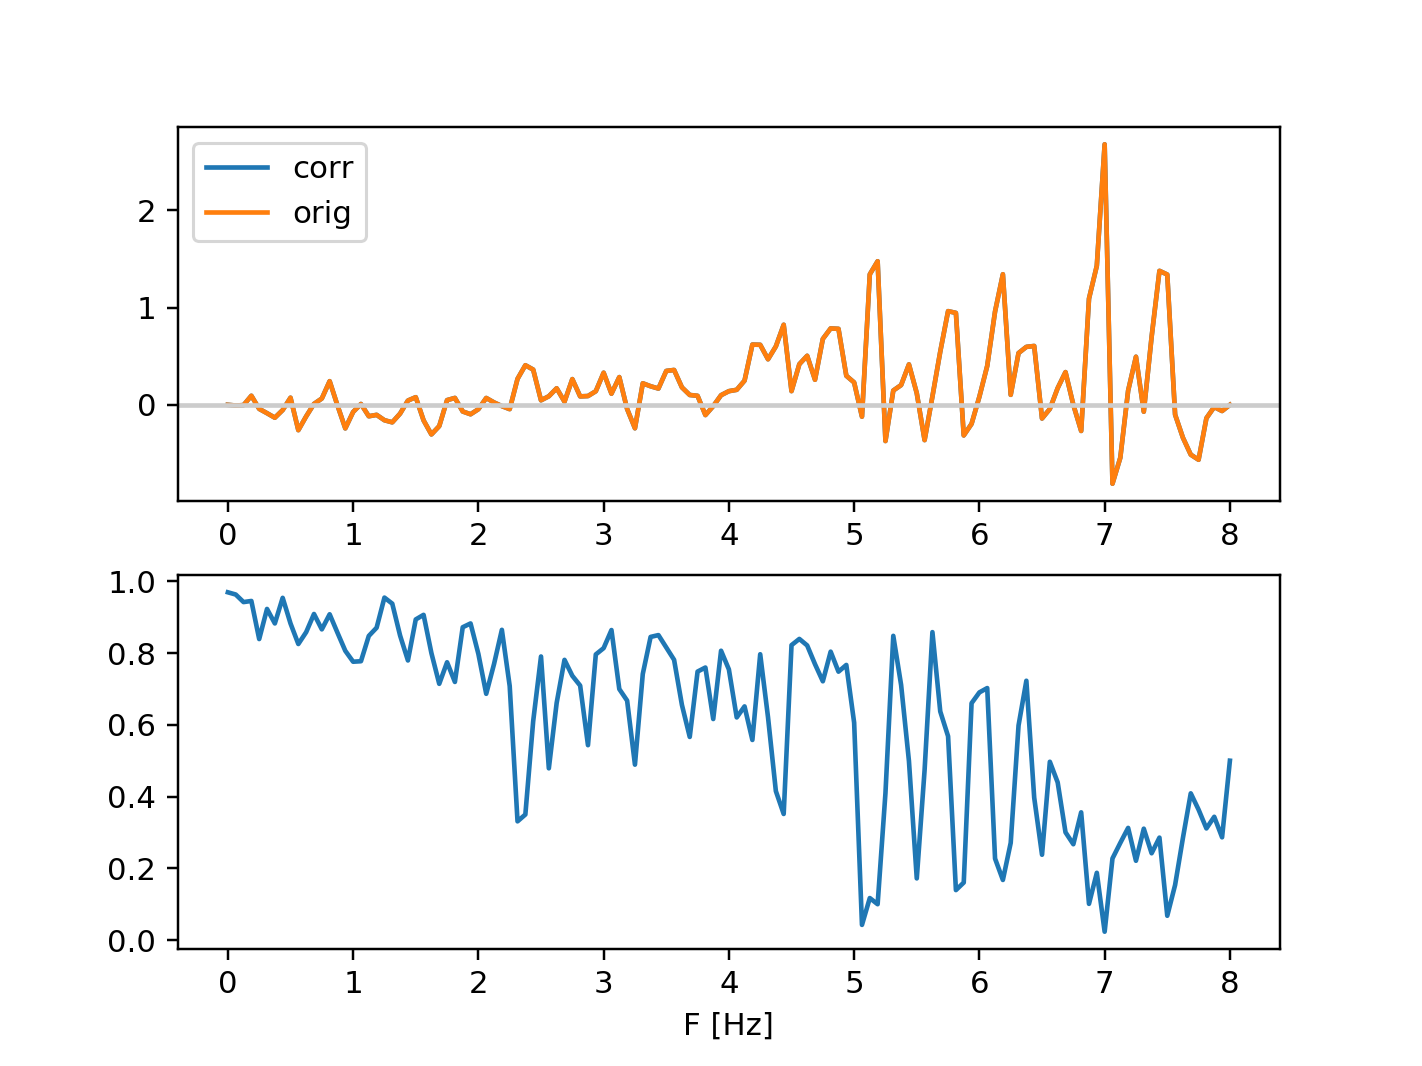

[5.15505987e-04+0.00000000e+00j 5.50983075e-03-3.74187097e-05j
 7.00021414e-04-2.04037818e-06j 1.35287865e-04+1.27051844e-05j
 3.44030226e-05-1.43057394e-06j 4.90907095e-05-4.22168951e-06j
 2.36296724e-05-3.14459378e-06j 2.38627555e-05-1.27950700e-06j
 7.12130684e-06+5.24595231e-07j 7.01814326e-06-1.87036481e-06j]
[ 0.         -0.00679116 -0.00291473  0.09363759 -0.04155886 -0.08578666
 -0.13230083 -0.05356812  0.07353277 -0.26045073]


In [9]:
with xr.open_dataset(fname) as ctd:
    ctd = ctd.isel(scan=slice(540, 1900))
    nfft = 256
    fftparams = {'fs': 16, 'nfft':nfft, 'noverlap':nfft/2, 'nperseg': nfft }
    f, Cxy0 = sig.csd(-ctd.temp, ctd.cond0, **fftparams)
    f, Cxy = sig.csd(-ctd.temp, ctd.cond, **fftparams)
    f, Ctt = sig.welch(ctd.temp, **fftparams)
    f, Ccc = sig.welch(ctd.cond, **fftparams)
    fig, axs = plt.subplots(2, 1)
    print(Cxy[:10])
    ang = ( np.arctan2(np.imag(Cxy), np.real(Cxy))+ np.pi ) % np.pi
    ang0 = (np.angle(Cxy0))
    ang = (np.angle(Cxy)) 
    print(ang[:10])
    ax = axs[0]
    ax.plot(f, ang, label='corr')    
    ax.plot(f, ang0, label='orig')
    ax.legend()
    ax.axhline(0, color='0.8')
    ax = axs[1]
    ax.plot(f, np.abs(Cxy)**2 / Ctt / Ccc)
    ax.set_xlabel('F [Hz]')